# Prediction of Survival rate using Logistic Regression

In [1]:
%matplotlib notebook
import numpy as np

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import math

titanic_data = pd.read_csv("titanic.csv")
titanic_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
print("# of passengers: "  +str(len(titanic_data.index)))

# of passengers: 891


<IPython.core.display.Javascript object>


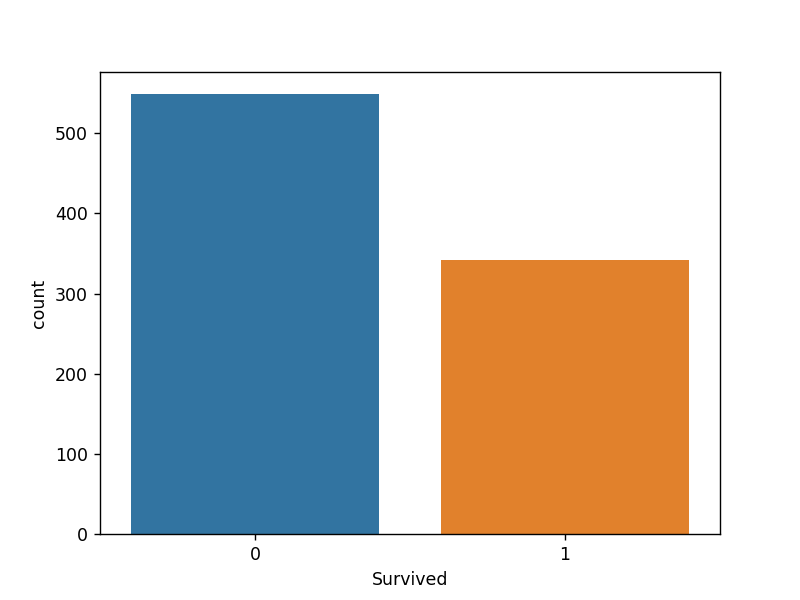

In [3]:
sns.countplot(x = "Survived" ,data = titanic_data)

<IPython.core.display.Javascript object>


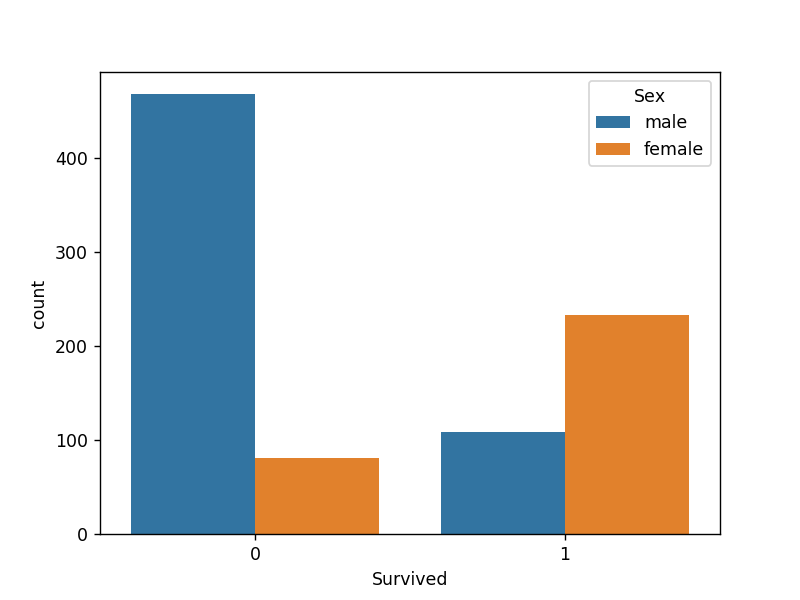

In [4]:
 sns.countplot(x="Survived",hue="Sex" ,data = titanic_data)


<IPython.core.display.Javascript object>


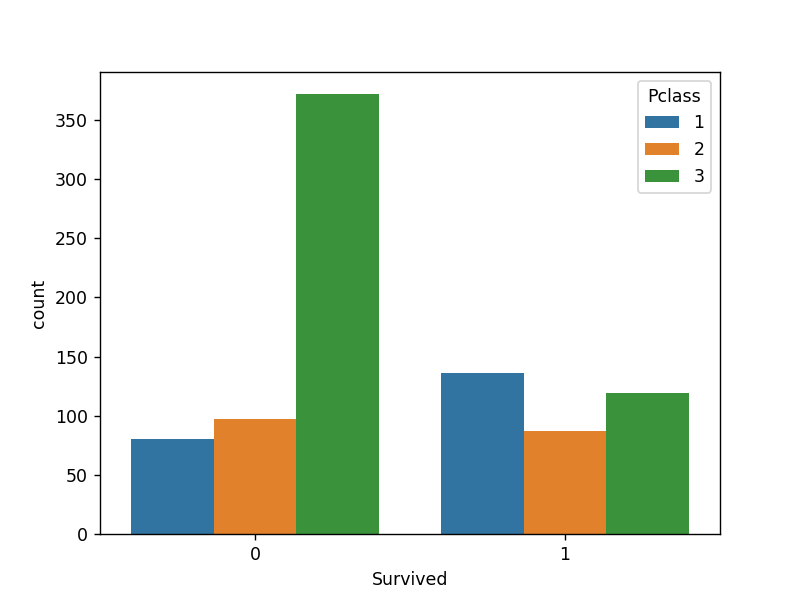

In [5]:
ax1 = sns.countplot(x = "Survived" , hue = "Pclass" ,data = titanic_data)


<IPython.core.display.Javascript object>


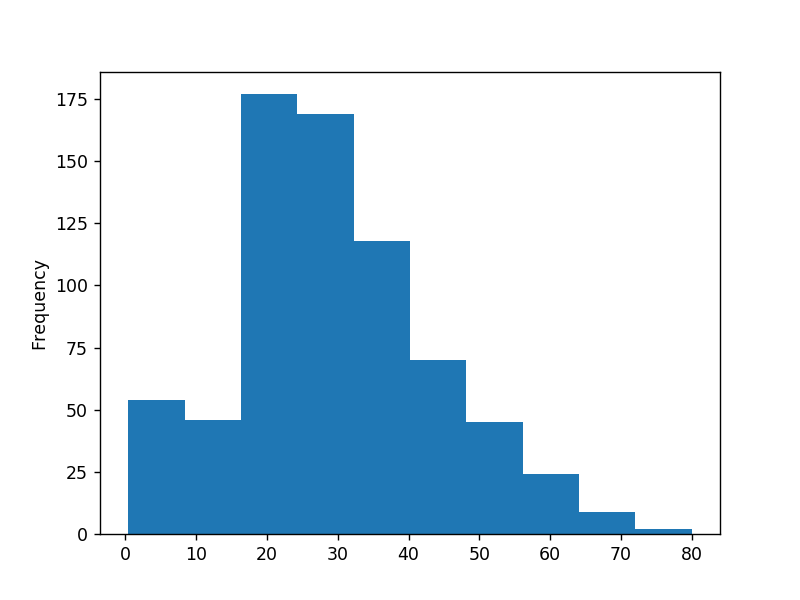

In [6]:
titanic_data["Age"].plot.hist()

<IPython.core.display.Javascript object>


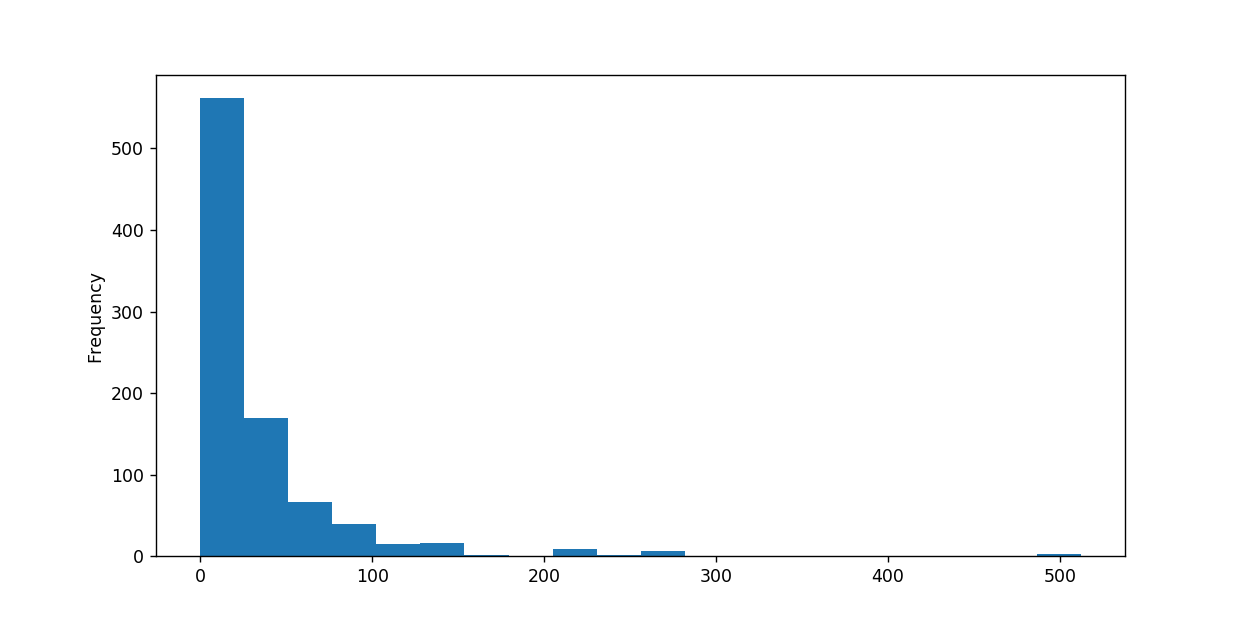

In [7]:
titanic_data["Fare"].plot.hist(bins = 20,figsize = (10,5))

In [8]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<IPython.core.display.Javascript object>


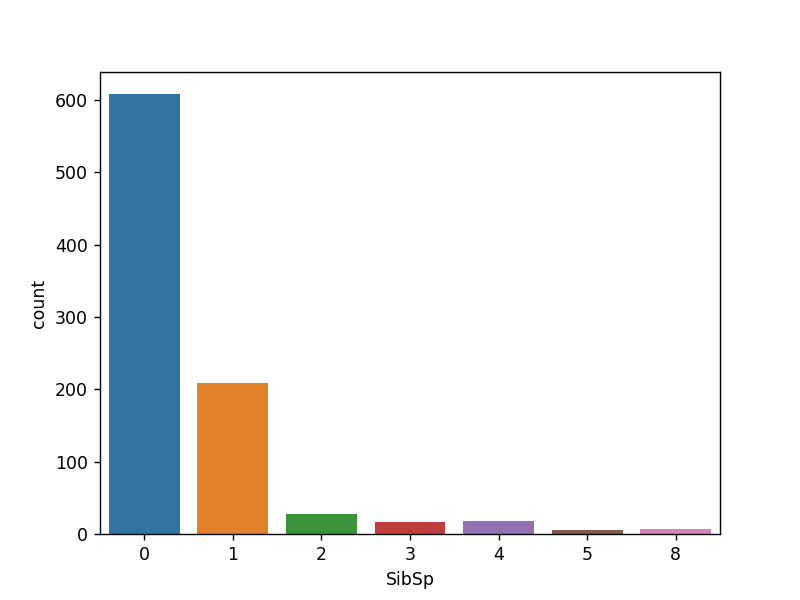

In [9]:
sns.countplot(x="SibSp",data=titanic_data)

# Data Wrangling 

In [10]:
#to check how many are null. true means null.
titanic_data.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [11]:
titanic_data.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<IPython.core.display.Javascript object>


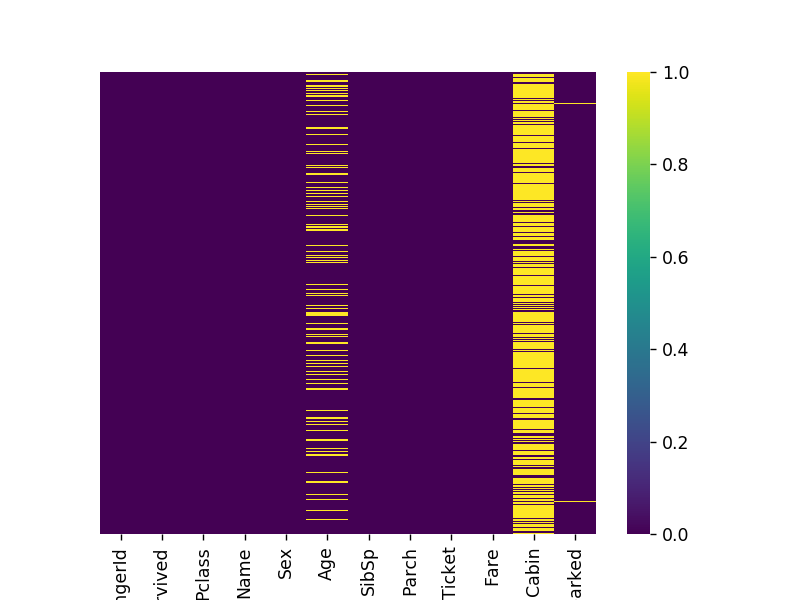

In [12]:
 sns.heatmap(titanic_data.isnull(),yticklabels = False,cmap = "viridis")

<IPython.core.display.Javascript object>


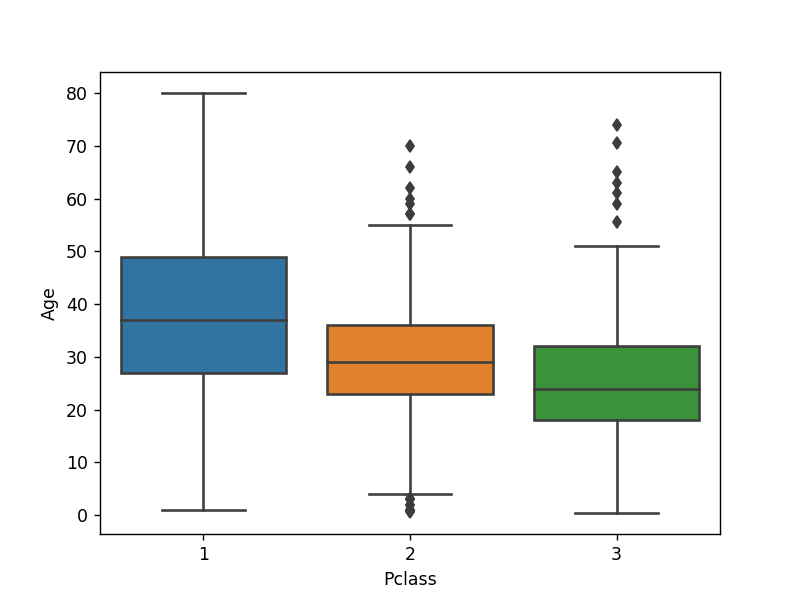

In [13]:
sns.boxplot(x = "Pclass", y = "Age",data = titanic_data)

In [14]:
titanic_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [15]:
#dropping a column
titanic_data.drop("Cabin",axis=1,inplace= True)

In [16]:
titanic_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [17]:
#dropping all the null values
titanic_data.dropna(inplace = True)

In [18]:
#wrangled data
#sns.heatmap(titanic_data.isnull(),yticklabels = False, cbar = False)

In [19]:
#using pandas to get dummy dataset
pd.get_dummies(titanic_data['Sex'])

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
885,1,0
886,0,1
887,1,0
889,0,1


In [20]:
#using pandas to get dummy dataset
sex = pd.get_dummies(titanic_data['Sex'],drop_first = True)
sex.head(5)

,male
0,1
1,0
2,0
3,0
4,1


In [21]:
#using pandas to get dummy dataset
embark = pd.get_dummies(titanic_data['Embarked'],drop_first = True)
embark.head(5)

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [22]:
#using pandas to get dummy dataset
pcl = pd.get_dummies(titanic_data['Pclass'],drop_first = True)
pcl.head(5)

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1


In [23]:
#to create a new dataset

titanic_data = pd.concat([titanic_data,sex,embark,pcl],axis = 1)
titanic_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,2,3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1,0,1


In [24]:
titanic_data.drop(["Name","Sex","Embarked","Ticket","PassengerId"],axis = 1,inplace = True)
titanic_data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,3,22.0,1,0,7.2500,1,0,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1,0,1
3,1,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,3,35.0,0,0,8.0500,1,0,1,0,1


In [25]:
titanic_data.drop("Pclass",axis = 1,inplace = True)


In [26]:
#independent variable
X = titanic_data.drop("Survived",axis = 1)
#dependent variable
y = titanic_data["Survived"]

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [29]:
from sklearn.linear_model import LogisticRegression

#creating an instance of LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

C:\Users\Welcome\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [30]:
predictions = logmodel.predict(X_test)

In [31]:
from sklearn.metrics import classification_report
classification_report(y_test,predictions)

'              precision    recall  f1-score   support\n\n           0       0.79      0.84      0.81       136\n           1       0.76      0.70      0.73        99\n\n    accuracy                           0.78       235\n   macro avg       0.77      0.77      0.77       235\nweighted avg       0.78      0.78      0.78       235\n'

In [32]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predictions)

array([[114,  22],
       [ 30,  69]], dtype=int64)

In [33]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)

0.7787234042553192